## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
import numpy as np
import tensorflow
print(tensorflow.__version__)

2.1.0-rc1


### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

###4. Find no.of samples in training and test dataset

In [155]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


###5. Find dimensions of an image in the dataset

In [156]:
print('Dimension of each image given in the dataset is', x_train.shape[1:3])

Dimension of each image given in the dataset is (28, 28)


### 6. Verify if existing labels/Classes are correct 

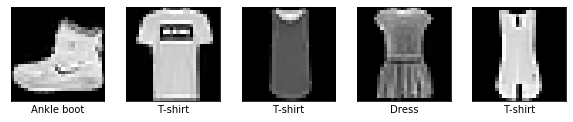

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
#Convert labels to one hot encoding
y_train_1 = tf.keras.utils.to_categorical(y_train)

In [0]:
y_test_1 = tf.keras.utils.to_categorical(y_test)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_1 = x_train/255
x_test_1 = x_test/255

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
#Reshaping the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [0]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [171]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [172]:
#Train the model
model.fit(x_train_1,y_train_1,          
          validation_data=(x_test_1,y_test_1),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.3544 - accuracy: 0.8727 - val_loss: 0.2682 - val_accuracy: 0.9005
Epoch 2/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2125 - accuracy: 0.9212 - val_loss: 0.2583 - val_accuracy: 0.9111
Epoch 3/10
60000/60000 [==============================] - 9s 152us/sample - loss: 0.1428 - accuracy: 0.9467 - val_loss: 0.2631 - val_accuracy: 0.9119
Epoch 4/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0925 - accuracy: 0.9660 - val_loss: 0.3156 - val_accuracy: 0.9108
Epoch 5/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0600 - accuracy: 0.9776 - val_loss: 0.3656 - val_accuracy: 0.9064
Epoch 6/10
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0408 - accuracy: 0.9852 - val_loss: 0.4060 - val_accuracy: 0.9115
Epoch 7/10
60000/60000 [=========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Initialize Sequential model2
model2 = tf.keras.models.Sequential()

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`



In [211]:
#trying `tensorflow.keras.backend.expand_dims`
x_train_dim =np.array( tf.keras.backend.expand_dims(x_train_1,axis=-1))
x_test_dim = np.array(tf.keras.backend.expand_dims(x_test_1,axis=-1))
print(type(x_train_dim))
print(type(x_test_dim))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
#Reshaping the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

In [0]:
#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

In [0]:
#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

In [0]:
#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)             

In [0]:
## Train the model

In [186]:
#Train the model
model2.fit(x_train_1,y_train_1,          
          validation_data=(x_test_1,y_test_1),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.3763 - accuracy: 0.8641 - val_loss: 0.2706 - val_accuracy: 0.9016
Epoch 2/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2428 - accuracy: 0.9104 - val_loss: 0.2445 - val_accuracy: 0.9100
Epoch 3/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1982 - accuracy: 0.9248 - val_loss: 0.2324 - val_accuracy: 0.9135
Epoch 4/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.1625 - accuracy: 0.9398 - val_loss: 0.2288 - val_accuracy: 0.9204
Epoch 5/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1383 - accuracy: 0.9477 - val_loss: 0.2278 - val_accuracy: 0.9216
Epoch 6/10
60000/60000 [==============================] - 9s 151us/sample - loss: 0.1157 - accuracy: 0.9571 - val_loss: 0.2272 - val_accuracy: 0.9242
Epoch 7/10
60000/60000 [=========================

###13. Verify accuracy of the model

> 

In [0]:
x_train_reshaped = x_train

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_1)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='red')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

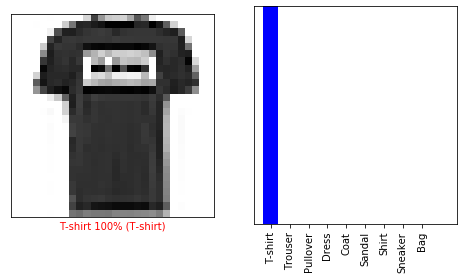

In [189]:
#Replace value of i with other index to check other product
i = 1
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
#Create an Image Generator
datagen = ImageDataGenerator(width_shift_range=0.2,horizontal_flip=True,vertical_flip=True,rotation_range=5)
#datagen= tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True)

In [208]:
datagen.fit(tf.keras.backend.expand_dims(x_test_1,axis=1))

/tensorflow-2.1.0/python3.6/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (10000, 1, 28, 28) (28 channels).
  ' channels).')


[link text](https://)####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()


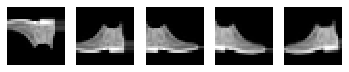

In [209]:
from matplotlib import pyplot as plt
gen = datagen.flow(tf.keras.backend.expand_dims(x_test_1[0:1]))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()